# Arbeidskrav 4
### SOK-1005, Vår 2025, Kandidatnr. 18

---
## D2 - Koding


In [52]:
# Importerer nødvenidge bibliotek

# oppg. 1 - 3
import pandas as pd
from bs4 import BeautifulSoup
import requests

# oppg. 4 - 5
from sklearn.linear_model import LinearRegression
import numpy as np

# oppg. 5
import matplotlib.pyplot as plt

In [53]:
# 1 - Skrap den angitte nettsiden og lagre resultatet i en dataramme.

# bruker funksjonene gitt i forelesning 9 - "webskraping med python" (mye er direkte kopiert fra forelesningsnotater)

url = 'https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132'

# henter alle mulige tabeller fra HTML'en av nettsiden
def fetch_html_tables(url):
    page = requests.get(url)
    bs = BeautifulSoup(page.content)
    tables = bs.find_all('table')
    return tables


# konverterer HTML-tabellen til en liste med lister
def html_to_table(html):
    # lager en liste som skal fylles med radene
    table=[]
    # går over hver enkelte rad i tabellen
    for row in html.find_all('tr'):
        # legger celleverdiene inn i listen r
        r=[]
        # finner alle vanlige celler, "table data" i hver rad
        cells=row.find_all('td')
        
        # leter etter overskriftsrader hvis den ikke finner celler
        if len(cells)==0:
            cells=row.find_all('th')
            
        # formaterer cellene slik at alle er på samme format uten spesialtegn el.
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        # legger listen r inn i tabellen
        table.append(r)
    return table


def format(cell):
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

tables = fetch_html_tables(url)
table_html = tables[0]


# lagrer tabellen til en csv fil
def save_data(file_name, table):
    f = open(file_name, 'w', encoding='utf-8')
    for row in table:
        f.write(';'.join(row) + '\n')
    f.close()


# bruker en samlet funksjon for å lage tabellen fra nettsiden
def scrape(url, file_name):
    table = []
    tables = fetch_html_tables(url)
    for tbl in tables:
        table.extend(html_to_table(tbl))
    # beholder bare de 4 radene vi trenger
    clean_table = [row for row in table if len(row) == 4]
    # ved feilmelding ba ChatGPT meg legge inn denne linjen slik at programmet skulle klare å lage en tabell med fire kolonner
    save_data(file_name, clean_table)
    return clean_table



# bruker den samlede funksjonen
filnavn = 'elbil_vintertest.csv'
scrape(url, filnavn)

# leser tabellen inn i pandas
df = pd.read_csv(filnavn, delimiter=';')

# printer ut tabellen
df

,Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [54]:
# 2 - Vask dataen til en tabell med bare relevante tall og gode overskrifter ved det følgende:
# a. Del kolonnen med WLTP-tall i to: en for kjørte km og en for energibruk.

# gir kolonnene bedre navn
df.columns = ["Bilmodell", "WLTP", "Stopp (km)", "Avvik (%)"]

# spurte om hjelp fra ChatGPT hvordan jeg skulle splitte en kolonne med verdier splittet av /
# koden er justert til å passe tabellen og oppgaven

# lager en  funksjon som splitter WLTP-tallene
def split_wltp(col):
    # lager en liste for kilometer
    km = []
    # lager en liste for strømforbruket (kilowattimer)
    kwh = []
    # går gjennom hver verdi i df[WLTP-tall]
    for value in col:
        # deler verdiene opp i /
        part = value.split('/')
        # fjerner "km" benevningen for å bare ha tall i tabellen
        # km var bare oppgitt i heltall
        km_value = int(part[0].replace("km", "").strip())
        # fjerner "kWh" benevningen for å bare ha tall i tabellen. Bytter komma til punktum for at tallene blir desimaltall i python
        kwh_value = float(part[1].replace("kWh", "").strip().replace("," , "."))
        # legger til de nye km verdiene inn i km lista
        km.append(km_value)
        # legger til de nye kwh verdiene inn i kwh lista
        kwh.append(kwh_value)
    # returnerer listene
    return km, kwh

# lager to nye kolonner ved å bruke funksjonen
wltp_km, wltp_kwh = split_wltp(df["WLTP"])
# ny km kolonne
df["WLTP (km)"] = wltp_km
# ny kWh kolonne
df["WLTP (kWh/100km)"] = wltp_kwh

# fjerner den originale WLTP-kolonnen
df = df.drop(columns=["WLTP"])


# c. Fjern rader med meningsløse eller manglende verdier fra datasettet.
# gjør oppgave c før b grunnet at det ikke er mulig å konverte ugyldige verdier, her: x, til float slik som skjer i oppg. b
# spurte ChatGPT hvordan jeg konverterer "x" til en na verdi for å så fjerne den
df = df.replace('x', pd.NA)
df = df.dropna()

# b. Hvis en kolonne har benevninger: legg alle benevningene til overskriften for kolonnen slik at det bare er tall i kolonnene.
# benevningene til wltp kolonnen er alt fikset i oppg. 2a
# bruker samme metode som i split-funksjonen
df["Stopp (km)"] = df["Stopp (km)"].str.replace("km", " ").str.strip().astype(int)
df["Avvik (%)"] = df["Avvik (%)"].str.replace("%", " ").str.replace("," , ".").astype(float)


# sorterer kolonnene i en "bedre" rekkefølge
df = df[["Bilmodell", "WLTP (km)", "WLTP (kWh/100km)", "Stopp (km)", "Avvik (%)"]]


df

,Bilmodell,WLTP (km),WLTP (kWh/100km),Stopp (km),Avvik (%)
0,Tesla Model 3 LR Dual motor,614,14.7,521,-15.15
1,Mercedes-Benz EQS 580 4matic,645,18.3,513,-20.47
2,BMW iX xDrive50,591,21.4,503,-14.89
3,Tesla Model Y LR Dual motor,507,16.9,451,-11.05
4,Volkswagen ID.3 PRO S,539,16.3,435,-19.29
5,Kia EV6 2WD,528,16.5,429,-18.75
6,NIO ES8 LR 7-seter,488,21.5,425,-12.91
7,Kia EV6 4WD,484,18.0,423,-12.60
8,Volkswagen ID.4 Pro,485,18.4,414,-14.64
9,Hyundai Ioniq 5 2WD,481,16.8,408,-15.18


In [55]:
# 3 - Lag en ny kolonne der forholdet mellom leverte antall kilometer og påståtte antall kilometer er angitt.

# forholdet mellom forventet stopp-lengde og faktisk stopp-lengde kan beskrives som stopp(km) / WLTP (km)
# lager en ny kolonne med dette forholdet
df["Avviksforhold"] = df["Stopp (km)"] / df["WLTP (km)"]

# runder av til 2 desimaler for mer oversiktlige tall
df["Avviksforhold"] = df["Avviksforhold"].round(3)


df

,Bilmodell,WLTP (km),WLTP (kWh/100km),Stopp (km),Avvik (%),Avviksforhold
0,Tesla Model 3 LR Dual motor,614,14.7,521,-15.15,0.849
1,Mercedes-Benz EQS 580 4matic,645,18.3,513,-20.47,0.795
2,BMW iX xDrive50,591,21.4,503,-14.89,0.851
3,Tesla Model Y LR Dual motor,507,16.9,451,-11.05,0.890
4,Volkswagen ID.3 PRO S,539,16.3,435,-19.29,0.807
5,Kia EV6 2WD,528,16.5,429,-18.75,0.812
6,NIO ES8 LR 7-seter,488,21.5,425,-12.91,0.871
7,Kia EV6 4WD,484,18.0,423,-12.60,0.874
8,Volkswagen ID.4 Pro,485,18.4,414,-14.64,0.854
9,Hyundai Ioniq 5 2WD,481,16.8,408,-15.18,0.848


In [56]:
# finner gjennomsnittlig avvik til rapporten:

float(df['Avvik (%)'].mean())

-19.0741935483871

In [57]:
# Lag en regresjonsmodell av typen 𝑓(𝑥) = 𝑎𝑥 + 𝑏 der WLTP-km er uavhengig variabel.

# spurte ChatGPT om hvordan jeg skulle lage en regresjonsmodell med tabellen jeg hadde

# lager variablene
# avhengig variabel (WLTP-km)
X = df[["WLTP (km)"]]
# uavhengig variabel (oppnådde km)
y = df["Stopp (km)"]

# lager en lineær regresjonsmodell
modell = LinearRegression()

# legger variablene inn i modellen
modell.fit(X, y)

# henter betingelsene for regresjonsmodellen
# henter ut a: stigningstall
a = modell.coef_[0]
# henter ut b: konstantledd
b = modell.intercept_

# printer modellen
print(f"f(x) = {a:.2f}x {b:.2f}")


f(x) = 0.87x -26.65


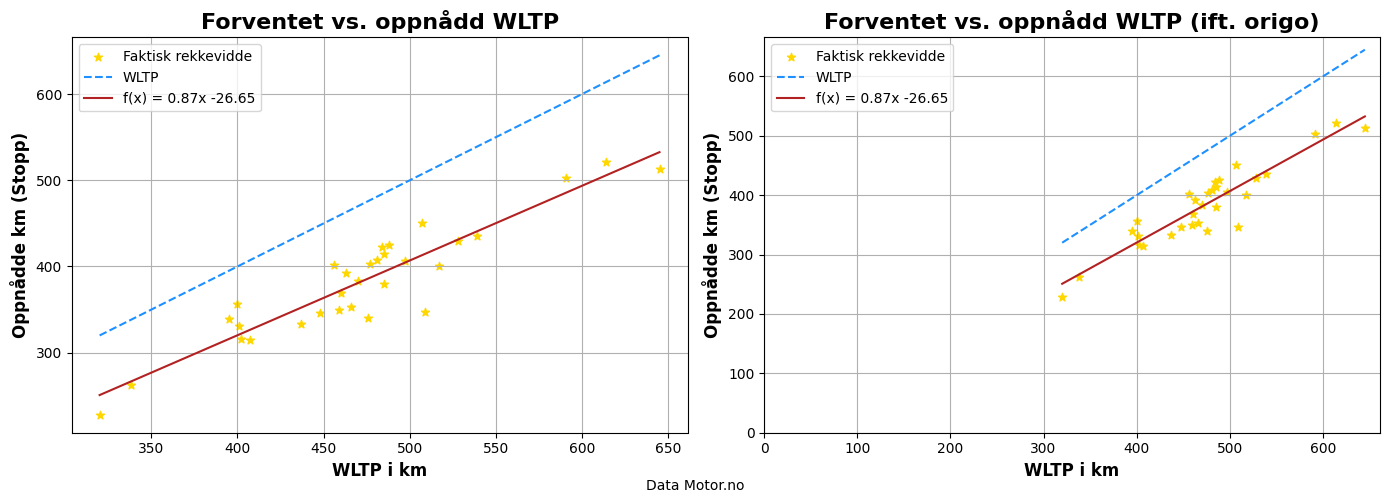

In [58]:
import warnings # fikk stadig en advarsel
warnings.filterwarnings("ignore")

# 5 - Plott modellen fra (4) mot datapunktene og leverandørens påståtte kjørelengde og sørg for at alle elementene i plottet er angitt tydelig for leseren. Plottet skal angis i to varianter: en variant som tar utgangspunkt i de x og y verdier som framkommer av dataen i tabellen, en annen som inkluderer origo.

# lager 100 punkter mellom minimum- og maksverdien til modellen
# scikit-learn krever en to-dimensjonal array, bruker reshape for å sikre at koden kjører (hjelp fra ChatGPT)
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# bruker .predict for å sette y-aksen basert på verdiene til modellen og x-aksen (hjelp fra ChatGPT)
y_values = modell.predict(x_values)


# plotter figurene ved siden av hverandre
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 1. plott med akser tilpasset modellen
# plotter punkt for hver modell
ax1.scatter(X, y, color = "#ffd700", label = "Faktisk rekkevidde", marker = "*")
# plotter en linje som gir verdiene til WLTP
ax1.plot(x_values, x_values, '--', color = "#1e90ff", label = "WLTP")
# plotter regresjonsmodellen
ax1.plot(x_values, y_values, color = "#b22222", label = f"f(x) = {a:.2f}x {b:.2f}")
# lager en tittel på figuren
ax1.set_title("Forventet vs. oppnådd WLTP", fontweight = "bold", size = 16)
# tittel på x-akse
ax1.set_xlabel("WLTP i km", fontweight = "bold", size = 12)
# tittel på y-akse
ax1.set_ylabel("Oppnådde km (Stopp)", fontweight = "bold", size = 12)
# legger til rutenett for lesbarhet
ax1.grid(True)
# legger til legende for å vise navn på hva som er plottet
ax1.legend()
# legger til kilde
fig.text(0.5, 0.01, 'Data Motor.no', ha='center', fontsize=10)

# 2. plott som inkluderer origo
ax2.scatter(X, y, color = "#ffd700", label = "Faktisk rekkevidde", marker = "*")
ax2.plot(x_values, x_values, '--', color = "#1e90ff", label = "WLTP")
ax2.plot(x_values, y_values, color = "#b22222", label = f"f(x) = {a:.2f}x {b:.2f}")
ax2.set_title("Forventet vs. oppnådd WLTP (ift. origo)", fontweight = "bold", size = 16)
ax2.set_xlabel("WLTP i km", fontweight = "bold", size = 12)
ax2.set_ylabel("Oppnådde km (Stopp)", fontweight = "bold", size = 12)
# setter x- og y-aksen til å starte i (0,0) (origo), og ikke ha noen grense
ax2.set_xlim(0, None)
ax2.set_ylim(0, None)
ax2.grid(True)
ax2.legend()


plt.tight_layout()
plt.show()


---

## D1 - Rapport

Denne rapporten tar utgangspunkt i "Motor og NAFs store rekkeviddetest" fra Motor.no (Motor, 2022) og har som hensikt i å fremlegge hvordan bilprodusentenes løfter holder opp mot virkeligheten.  

WLTP tallene gir oss distansen den enkelte bilmodellen klarer å kjøre på en full lading, samt hvor mye strøm den bruker per 100 km (ChatGPT, 2025). Ved bruk av python har vi gjenskapt figuren fra Motor.no. Tabellens "Avvik (%)" kolonne viser oss at alle modellene hadde avvik fra forventet rekkevidde til faktisk rekkevidde. Ved å sortere tabellen etter avvik får vi et bedre innblikk i hvilke modeller som kom dårligst ut av undersøkelsen:

In [59]:
df_sorted = df.sort_values(by = 'Avvik (%)', ascending = True)
df_sorted

,Bilmodell,WLTP (km),WLTP (kWh/100km),Stopp (km),Avvik (%),Avviksforhold
22,Skoda Enyaq iV80,509,17.7,347,-31.83,0.682
32,Peugeot e-2008,320,15.6,228,-28.75,0.712
24,Polestar 2 LR Dual motor,476,20.2,340,-28.57,0.714
20,Volkswagen ID.4 GTX,466,18.6,353,-24.20,0.758
21,Audi e-tron Q4 50 quattro,459,19.1,349,-23.97,0.760
27,Volvo C40 Recharge,437,21.1,333,-23.80,0.762
23,Tesla Model 3 SR,448,14.0,346,-22.87,0.772
13,Polestar 2 LR Single motor,517,18.6,400,-22.63,0.774
30,Mercedes-Benz EQB 350 4matic,407,18.1,315,-22.60,0.774
31,Opel Mokka-e,338,16.2,263,-22.19,0.778


De fem modellene som gjorde det dårligst var Skoda Enyaq iV80, Peugeot e-2008, Polestar 2 LR Dual motor, Volkswagen ID.4 GTX, Audi e-tron Q4 50 quattro. Fellestrekk hos disse bilene var at de hadde firehjulstrekk og var store og tunge med mindre god aerodynamikk (ChatGPT). Tunge biler trenger mer energi og vil da som regel ha kortere rekkevidde, særlig med flere passasjerer. De fem bilene med minst avvik: BYD Tang, Tesla Model Y LR Dual moto, Porsche Taycan 4 Cross Turismo, Kia EV6 4WD, og NIO ES8 LR 7-seter, er alle nyere biler. Disse er trolig bedre utviklet med mer moderne batteri som er tilpasset variert klima; Eller så er batteriene rett og slett bedre. Vi ser altså at alle biler ikke har samme utgangspunkt eller oppbyggning, og kan dermed få svært forskjellige resultater fra hverandre.

Sammenhengen mellom avvik (%) og avviksforholdet er de gir ulike tallformer av avvik. Avviksforholdet kan bli beskrevet som: 
$$
\text{Avviksforhold} = \frac{\text{Faktisk oppnådd distanse}}{\text{WLTP distanse}}
$$
Mens avvik (%) viser hvor mange prosent som manglet i WLTP distansen, viser avviksforholdet hvor mye den faktiske distansen oppnådde av WLTP distansen. Det er altså som to sider av samme mynt. Ved bruk av python er det kommet frem til av det gjennomsnittlige avviket (i prosent) lå på hele **-19.07** prosent. Bilprodusentene lover da gjennomsnittlig at bilene skal kunne gå rundt 20 prosent lenger enn de faktisk klarer, men hvorfor lyver de om dette?


Det er ikke sikkert at bilprodusentene lyver i det hele tatt. Avvik fra oppgitt distanse til faktisk distanse kan komme av en rekke faktorer; Både fra produsent og konsuments side. Vi fokuserer først på konsumentene: Hvordan kjøperen av bilen behandler bilen har stor påvirkning på bilens ytelse. Andre faktorer som påvirker bilens rekkevidde, men som produsenten ikke har kontroll over, er: Dårlig terregn, uvær og kaldt klima, bilens last, og sjåførens kjørestil (Wessex Fleet, u.å.). I Norge er særlig kaldt vær en avgjørende faktor for bilenes rekkevidde. NAF sier selv på deres nettsider at en må regne med å miste mellom 4 til 30 prosent av rekkevidden ved bare et par minubsgrader (Sødal, 2024). Dette kommer simpelt av at bilen bruker ekstra energi på å holde seg varm, noe som tapper av batterikapasiteten. Produsentene har ikke noe for hvem som kjøper bilene og hvilket klima de kjører i: Det de derimot har påvirkning på er hvilken informasjon kjøperne får om bilens rekkevidde. Produsentene kunne unngått negativ omtale angående bilens rekkevidde om vinteren hvis de enkelt informerte kjøperne om hvor mye batterikapasitet de kan forvente å miste i visse værforhold. De hadde naturligvis falt lenger ned på lista over forventet rekkevidde, men de hadde kommet bedre ut på tester som denne av NAF og Motor.no.

Vi kan visualisere funnene våre i tabellen med en regresjonsmodell. En slik modell setter i perspektiv hvor bra eller dårlig bilene preseterer i forhold til tallene produsentene selv har oppgitt. Den blå stiplede linjen er en samling av WLTP verdier: I teorien skal alle bilmodellene treffe denne linjen. Som figuren viser, gjør derimot ingen av dem det. Også stigningstallet i modellen forteller noe: Det at stigningstallet er < 1 (her: 0.86) forteller at bilmodellene gjennomsnittlig bare møter 86 prosent av rekkevidden de skal møte.

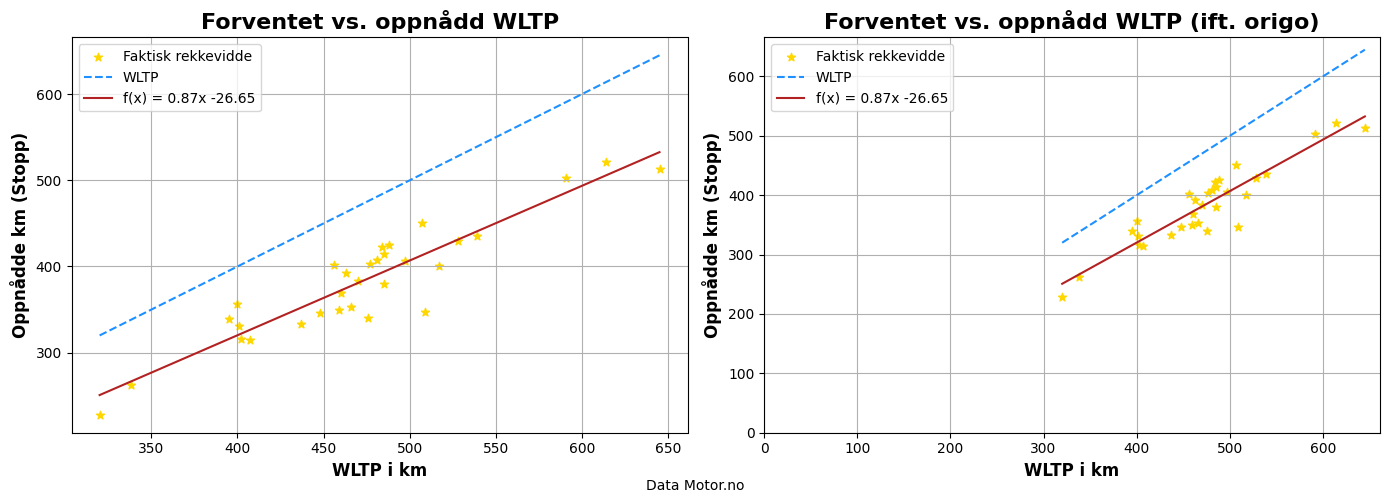

In [60]:
fig

I noen tilfeller kan figurer gi misvisende resultater grunnet "juks" i aksene. Vi har derfor valgt å presentere funnene i to grafer: En der aksene starter på regresjonsmodellens laveste verdi, og en som starter i origo (0,0). Aksene kan til tider gi misvisende svar i form av at observasjoner virker mye større eller mindre enn de egentlig er grunnet mangel på kontekst. Den første figuren vår kan blant annet gi inntrykk av at noen biler knapt har rekkevidde, siden punktene ligger så langt til venstre. Figur nr. 2 viser derimot at tross å ha kortest rekkevidde, kommer man hele 228km (Peugeot e-2008)på en full ladning; Det er helt fra Stavanger til Bergen! 

Tross svært forskjellige akser tilfredsstiller figurene hvert sitt formål. Figur 1 er mer lesbar og gir et godt innblikk i hvordan modellene holder seg til forventinger. Figur 2 gir derimot et mer realistisk og helhetlig bilde over hvordan bilene presterer.

For å oppsummere viser rapporten at ved Motor og NAFs siste rekkeviddetest, hadde bilene et gjennomsnittlig avvik på -19.07 prosent. Avvikene kan oppstå av en rekke grunner, med bilens oppbyggning og uteklima som sannsynlige hovedfaktorer. Ved bruk av en regresjonsmodell får vi et tydeligere bilde på hvordan alle bilmodellene ikke levde opp til standarden kjøperne ble lovet. Resultatene gir to klare utsagn: Bilprodusenter bør gi mer tilstrekkelig informasjon angående rekkevidde, mens kjøpere burde være forberedt på at egen bruk av bil og klima de kjører i, har stor påvirkning på hvor langt de kommer på veien.

### Kilder

Raaum, P. & Monn-Iversen, Ø. A. (2022, 4. februar). *Så mye rekkevidde gikk tapt i vinterkulda*. Hentet 23.03.2025: https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132

Sødal, N. (2024, 31. januar). *Planlegg for 25 prosent kortere rekkevidde om vinteren*. Hentet 23.03.2025: https://www.naf.no/elbil/bruke-elbil/planlegg-for-25-prosent-kortere-rekkevidde-om-vinteren


Wessex Fleet. (u.å.). *EV Range*. Hentet 23.03.2025: https://www.wessexfleet.co.uk/guides/driver/electric-vehicle-range/
